# Applying Advanced Transformations (Core)
- Alexis Deviney
- 04/25/2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

Your task is two-fold:

I. Clean the files and combine them into one final DataFrame.

This dataframe should have the following columns:
* Hero (Just the name of the Hero)
* Publisher
* Gender
* Eye color
* Race
* Hair color
* Height (numeric)
* Skin color
* Alignment
* Weight (numeric)
* Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
    * Agility
    * Flight
    * Superspeed
    * etc.
   
Hint: There is a space in "100 kg" or "52.5 cm"



In [2]:
df = pd.read_csv('Data/superhero_info - superhero_info.csv')
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


First I will separate the `Hero | Publisher` column into separate columns

In [3]:
df[['Hero','Publisher']] = df['Hero|Publisher'].str.split('|',expand=True)
df = df.drop(columns=['Hero|Publisher'])
df.head(1)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics


Now I will examine the `Measurements` column to make separate `Height` and `Weight` columns:

In [4]:
type(df.loc[0, 'Measurements'])

str

The entries in the `Measurements` column appear to be a dictionary but they are actually a string. I will convert these values to actual dictionaries before unpacking each value into separate columns.

In [5]:
#replace all single quotes with double quotes to prepare strs for json.loads
df['Measurements'] = df['Measurements'].str.replace("'",'"')
df['Measurements'] = df['Measurements'].apply(json.loads)
df['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [6]:
type(df.loc[0, 'Measurements'])

dict

In [7]:
# unpack dictionary into two separate columns using pd.Series
height_weight = df['Measurements'].apply(pd.Series)

In [8]:
height_weight['Height'].str.split(' ',expand=True)[1].value_counts()
# all heights are in units of cm

cm    463
Name: 1, dtype: int64

In [9]:
height_weight['Height'] = height_weight['Height'].str.split(' ',expand=True)[0].astype('float32')

In [10]:
height_weight

,Height,Weight
0,203.0,441.0 kg
1,191.0,65.0 kg
2,185.0,90.0 kg
3,203.0,441.0 kg
4,193.0,122.0 kg
...,...,...
458,183.0,83.0 kg
459,165.0,52.0 kg
460,66.0,17.0 kg
461,170.0,57.0 kg


In [11]:
height_weight['Weight'].str.split(' ',expand=True)[1].value_counts()
# all weights are in units of kg

kg    463
Name: 1, dtype: int64

In [12]:
height_weight['Weight'] = height_weight['Weight'].str.split(' ',expand=True)[0].astype('float32')

In [13]:
height_weight.head(2)

,Height,Weight
0,203.0,441.0
1,191.0,65.0


In [14]:
height_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  463 non-null    float32
 1   Weight  463 non-null    float32
dtypes: float32(2)
memory usage: 3.7 KB


In [15]:
# concatenate transformed height_weight with original dataframe
df = pd.concat((df, height_weight), axis = 1)
df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0


In [16]:
df = df.drop(columns = 'Measurements')

In [17]:
df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0


In [18]:
# now to add hot-encoded powers to above dataframe
# first import the powers csv
pw = pd.read_csv("Data/superhero_powers - superhero_powers.csv")
pw.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [19]:
pw['Powers_List'] = pw['Powers'].str.split(',')

In [20]:
pw.head(2)

,hero_names,Powers,Powers_List
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."


In [21]:
exploded = pw.explode('Powers_List')[['hero_names', 'Powers_List']]
exploded

,hero_names,Powers_List
0,3-D Man,Agility
0,3-D Man,Super Strength
0,3-D Man,Stamina
0,3-D Man,Super Speed
1,A-Bomb,Accelerated Healing
...,...,...
665,Zatanna,Weather Control
666,Zoom,Super Speed
666,Zoom,Intangibility
666,Zoom,Time Travel


In [22]:
cols_to_make = exploded['Powers_List'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [23]:
for col in cols_to_make:
    pw[col] = pw['Powers'].str.contains(col)
pw.head()

C:\Users\Alexis\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,hero_names,Powers,Powers_List,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
pw = pw.drop(columns = ['Powers', 'Powers_List'])
pw = pw.rename(columns = {'hero_names': 'Hero'})
pw

,Hero,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


## **Final Dataframe**

In [25]:
df = pd.merge(df,pw, on='Hero')
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


# Use combined dataframe to answer the following questions

## Compare the average weight of super powers who have Super Speed to those who do not.

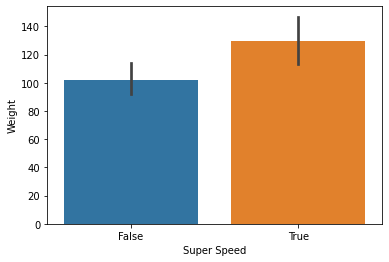

In [27]:
df.groupby('Super Speed')['Weight'].mean()
#sns.barplot(x = to_plot.index, y = to_plot.values)
sns.barplot(data = df, x = 'Super Speed', y = 'Weight')

In [29]:
df.groupby('Super Speed')['Weight'].mean()

Super Speed
False    101.773582
True     129.404037
Name: Weight, dtype: float32

## What is the average height of heroes for each publisher?

In [30]:
df.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923920
Dark Horse Comics    176.909088
George Lucas         159.600006
Image Comics         211.000000
Marvel Comics        191.546127
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float32

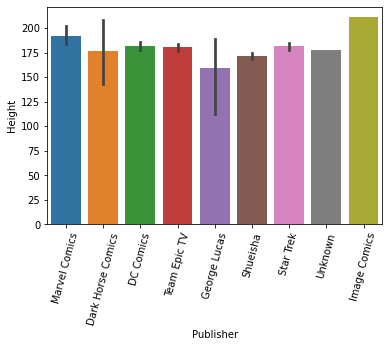

In [33]:
sns.barplot(data = df, x = 'Publisher', y = 'Height')
locs, labels = plt.xticks()
plt.setp(labels, rotation=75);